# Difference in English 12 averages for public vs. private school students
### STAT 201 Group 16 - Karina Grewal, Michelle Kim, Alex Lee, Janine Xu

## Introduction

Inequality of quality of education and achievement imbalance in public and private/independent schools students was seen in many different countries including the USA<sup>2</sup>, Mexico<sup>3</sup>, and China<sup>4</sup>. Canada spends more than 5% of the federal budget on public education, recording one of the highest in the world<sup>5</sup>. Private schools, in general, are thought to provide a better education than public schools. Due to the high tuition cost, independent schools may have better resources and more qualified teachers. Public schools may have larger class sizes, so students may have less support in their learning. So, we became curious if we can observe a similar phenomenon in Canada, particularly BC, where the students from independent schools showcase higher academic achievement than in public schools.

**Question**: Are English 12 marks higher in independent schools in BC compared to public schools?

**Random variable**: average mark per school (%)

**Categorical variables**: BC public school vs independent school

**Location parameter**: difference in mean (if average marks are higher in private vs public schools)

**Scale parameter**: standard deviation (can be used to find confidence interval and shows the spread of the data)

Our dataset is from the BC Ministry of Education⁵ and shows examination results from 2016-2020. The dataset contains several important columns for our analysis:
- PUBLIC_OR_INDEPENDENT (type of school, independent/public)
- EXAM_SUBJECT (includes 4 language course types, such as English 12)
- MARK_TYPE (type of mark given, e.g. final marks or exam marks)
- AVERAGE_PERCENT (the average percentage in a school)

We decided to look at final marks, which are the final marks for each course blending exam results and course results, to get the full picture of student scores. The only course types available were language courses, so we also focused on English 12 because it was the most commonly taken compulsory grade 12 course in BC, compared with other courses, such as Français 12, which is only offered in French Immersion schools.


## Methods and Results

In [1]:
# import necessary libraries and packages
library(tidyverse)
library(tidymodels)
library(repr)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.1     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.8      ✔ rsample   0.0.7 
✔ infer     0.5.3      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.1.3 
✔ parsnip   0.1.3    

First, we loaded our data directly from the web (Github). The data is an official government-released source for grades of grade 12 students studied in BC from 2016 to 2020. Therefore, it will be appropriate to generalize our findings to all grade 12 students in BC high schools. 

Since we are planning to perform a hypothesis test, we did a quick check on the data size based on school type to ensure that we have enough data points to work with. 

As a part of wrangling and cleaning the data, we selected only the variables of interest (PUBLIC_OR_INDEPENDENT, AVERAGE_PERCENT, MARK_TYPE, EXAM_SUBJECT), then filtered to narrow down the range of the data to the final marks in English 12.

We didn't scale or centre the data since the original data was already scaled and centred to be out of 100 by the institution. We can consider the difficulties of the course to get rid of any biases, but that is out of the scope of this investigation as we do not have the data to determine how hard. 


In [2]:
# read data from the web
exam_data <- read_delim("https://raw.githubusercontent.com/michelleykim/bc_exams_analysis/main/data/provincial-required-examinations-2016_2017_to_2019_2020.csv", delim = ",")

# check if data size is sufficient
exam_test<-exam_data %>% 
    select(PUBLIC_OR_INDEPENDENT) %>% 
    group_by(PUBLIC_OR_INDEPENDENT) %>% 
    summarize(n=n())
print('Tibble 1: Number of schools in BC per school type')
exam_test

# clean and wrangle data into tidy format
exam_school_type <- exam_data  %>% 
                    select(PUBLIC_OR_INDEPENDENT, AVERAGE_PERCENT, MARK_TYPE, EXAM_SUBJECT) %>% 
                    filter(AVERAGE_PERCENT != "Msk") %>% 
                    filter(PUBLIC_OR_INDEPENDENT == "BC Public School" |PUBLIC_OR_INDEPENDENT == "BC Independent School") %>%
                    filter(EXAM_SUBJECT == "ENGLISH 12" & MARK_TYPE == "Final Marks" ) %>% 
                    mutate(AVERAGE_PERCENT = as.numeric(AVERAGE_PERCENT))
print('Tibble 2: Clean and wrangled dataset')
head(exam_school_type)

Parsed with column specification:
cols(
  .default = col_character(),
  SCHOOL_NUMBER = col_logical(),
  SCHOOL_NAME = col_logical(),
  GRADE = col_double()
)

See spec(...) for full column specifications.

Warning message:
“81714 parsing failures.
 row           col           expected                actual                                                                                                                                     file
2314 SCHOOL_NUMBER 1/0/T/F/TRUE/FALSE 00502001              'https://raw.githubusercontent.com/michelleykim/bc_exams_analysis/main/data/provincial-required-examinations-2016_2017_to_2019_2020.csv'
2314 SCHOOL_NAME   1/0/T/F/TRUE/FALSE Mount Baker Secondary 'https://raw.githubusercontent.com/michelleykim/bc_exams_analysis/main/data/provincial-required-examinations-2016_2017_to_2019_2020.csv'
2315 SCHOOL_NUMBER 1/0/T/F/TRUE/FALSE 00502001              'https://raw.githubusercontent.com/michelleykim/bc_exams_analysis/main/data/provincial-required-exam

[1] "Tibble 1: Number of schools in BC per school type"


PUBLIC_OR_INDEPENDENT,n
<chr>,<int>
BC Independent School,7377
BC Public School,41316
Province-Total,225


[1] "Tibble 2: Clean and wrangled dataset"


PUBLIC_OR_INDEPENDENT,AVERAGE_PERCENT,MARK_TYPE,EXAM_SUBJECT
<chr>,<dbl>,<chr>,<chr>
BC Public School,73.2,Final Marks,ENGLISH 12
BC Public School,68.2,Final Marks,ENGLISH 12
BC Public School,73.6,Final Marks,ENGLISH 12
BC Public School,70.6,Final Marks,ENGLISH 12
BC Public School,73.4,Final Marks,ENGLISH 12
BC Independent School,78.2,Final Marks,ENGLISH 12


We took a sample of 40 and 40 from the dataset. We could've calculated the population parameter direction with high accuracy since our dataset contains the English 12 grade from every single high school in BC. However, we decided to take a sample to simulate more common occasions where the population is unknown.

In [3]:
#get a sample
set.seed(10)
exam_school_type_sample_public <- exam_school_type %>% 
        filter(PUBLIC_OR_INDEPENDENT == "BC Public School") %>% 
        rep_sample_n(size = 40) 

exam_school_type_sample_Independent <- exam_school_type %>% 
        filter(PUBLIC_OR_INDEPENDENT == "BC Independent School") %>% 
        rep_sample_n(size = 40) 

exam_school_type_sample <- rbind(exam_school_type_sample_public, 
                                 exam_school_type_sample_Independent) %>% 
                        ungroup() %>% 
                        select(-replicate, -MARK_TYPE)
print('Tibble 3: 40 random samples of each school type')
head(exam_school_type_sample)

[1] "Tibble 3: 40 random samples of each school type"


PUBLIC_OR_INDEPENDENT,AVERAGE_PERCENT,EXAM_SUBJECT
<chr>,<dbl>,<chr>
BC Public School,77.6,ENGLISH 12
BC Public School,70.2,ENGLISH 12
BC Public School,79.8,ENGLISH 12
BC Public School,73.8,ENGLISH 12
BC Public School,77.8,ENGLISH 12
BC Public School,73.2,ENGLISH 12


`summarise()` regrouping output by 'PUBLIC_OR_INDEPENDENT' (override with `.groups` argument)



[1] "Tibble 4: Statistics of each school type"


PUBLIC_OR_INDEPENDENT,EXAM_SUBJECT,mean,sd
<chr>,<chr>,<dbl>,<dbl>
BC Independent School,ENGLISH 12,76.330,8.212224
BC Public School,ENGLISH 12,71.915,4.647003


[1] "Tibble 5: Differene in mean grade observed from sample"


diff_in_mean
<dbl>
4.415


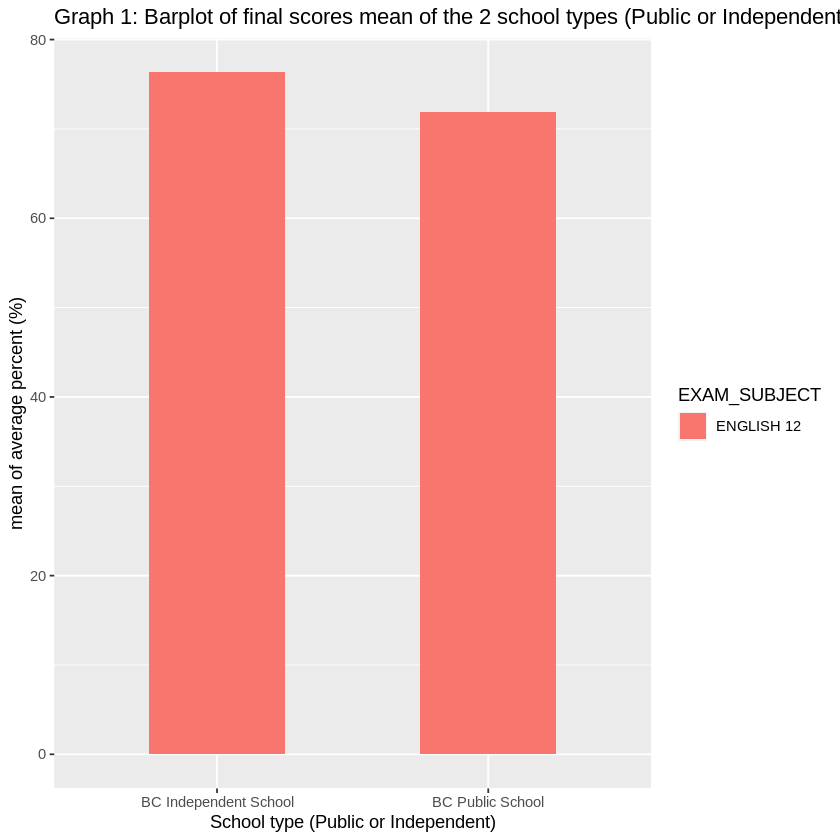

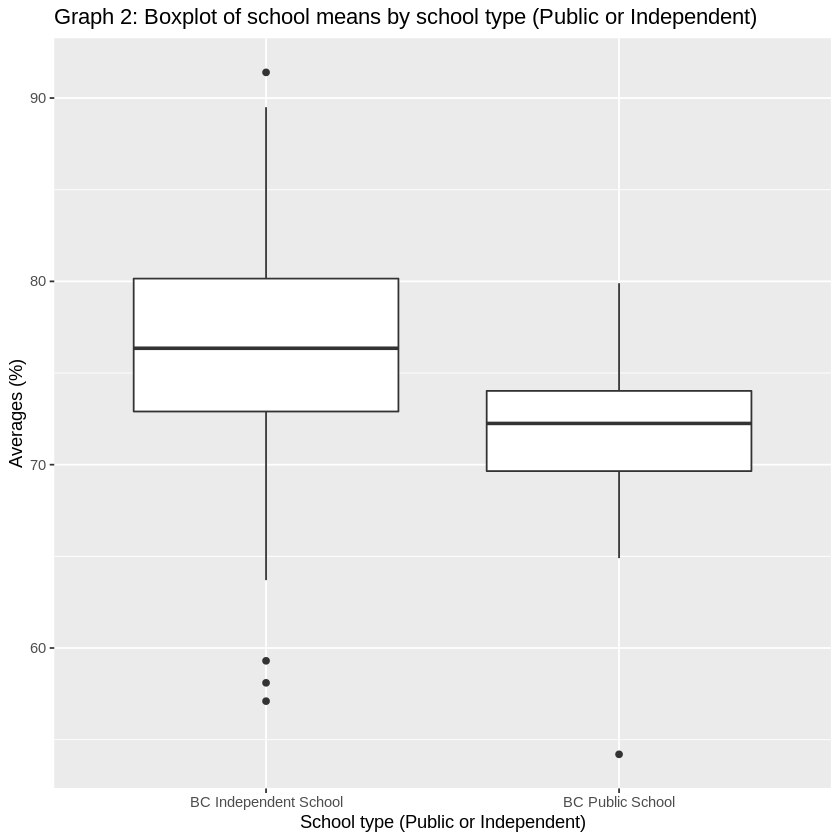

In [4]:
# getting the mean and standard deviation of average percent for each school type 
#   and the diff of their mean (BC Independent School - BC Public School)
data_for_each_catetegory<- exam_school_type_sample %>% 
                group_by(PUBLIC_OR_INDEPENDENT, EXAM_SUBJECT) %>% 
                summarize(mean = mean(AVERAGE_PERCENT),
                          sd = sd(AVERAGE_PERCENT))
print('Tibble 4: Statistics of each school type')
data_for_each_catetegory

obs_diff_in_mean <-   exam_school_type_sample  %>% 
    specify(formula = AVERAGE_PERCENT ~ PUBLIC_OR_INDEPENDENT) %>%
    calculate(stat = "diff in means", order = c("BC Independent School", "BC Public School")) %>% 
    mutate(diff_in_mean = stat) %>% 
    select(-stat)
print('Tibble 5: Differene in mean grade observed from sample')
obs_diff_in_mean

# generate bar graph
exam_barplot <- data_for_each_catetegory %>%
    ggplot(aes(x = PUBLIC_OR_INDEPENDENT, y = mean, , fill = EXAM_SUBJECT )) +
    geom_bar(stat="identity", position = "dodge", width = 0.5) +
    xlab("School type (Public or Independent)") +
    ylab("mean of average percent (%)") +
    ggtitle("Graph 1: Barplot of final scores mean of the 2 school types (Public or Independent)") 
exam_barplot

# generate boxplot 
exam_boxplot <- exam_school_type_sample %>%
    ggplot() +
    geom_boxplot(aes(x = PUBLIC_OR_INDEPENDENT, y = AVERAGE_PERCENT)) +
    xlab("School type (Public or Independent)") + 
    ylab("Averages (%)") +
    ggtitle("Graph 2: Boxplot of school means by school type (Public or Independent)") 
exam_boxplot

The preliminary research above suggests that the notable difference between mean averages of private/independent and public schools may be due to the sampling variation. 

By conducting a hypothesis test, we will be able to tell whether our findings are statistically significant. We will conduct a one-sided hypothesis test:
- **Null hypothesis**: There is no difference in the final English 12 grades in public or independent high schools in BC
- **Alternate hypotheis**: In BC, independent high schools have higher English 12 final mark than public high schools

We will be using bootstrapping to simulate the null distribution and obtain the p-value and the confidence interval. As well, because our dataset does not break the 3 rules needed to perform CLT, we will also be using the CLT/t-test to obtain the p-value and confidence interval. The sample was drawn independently through random sampling on R from the dataset. The size was n=40 for both samples, which is less than 10% of the overall population but is large enough for a good approximation for the CLT. Because we are taking a random sample, we do not have sigma for both populations, so we will be using the t-test to account for the uncertainty from the sample standard deviation.

We used the functions from the infer package to simulate bootstrap samples. Specify() function sets the explanatory and response variables, generate() function produces 10000 bootstrap functions with the size same as the sample size, and calculate() function computes the difference in means.


In [5]:
#bootrap distribution of 10000 reps using the infer package
set.seed(1)
bootstrap_distribution<- exam_school_type_sample %>% 
        specify(formula = AVERAGE_PERCENT ~PUBLIC_OR_INDEPENDENT ) %>% 
        generate(reps = 10000, type = "bootstrap") %>% 
        calculate(stat = "diff in means", c("BC Independent School", "BC Public School")) 
print('Tibble 6: Bootstrap distribution of 10000 reps')
head(bootstrap_distribution)

[1] "Tibble 6: Bootstrap distribution of 10000 reps"


replicate,stat
<int>,<dbl>
1,2.76291640
2,3.78655410
3,6.11867168
4,-0.06967419
5,3.89693558
6,5.04015009


Our confidence intervals will cover the mean grades of each type of school as well as the difference in mean grades. We choose to get a 95% confidence interval since it will give us a range of plausible values with an interval narrow enough to be useful while staying relatively confident that the true difference is contained in the interval. We do not need to guess the exact value of the population parameter (difference in mean), while we still want to have most of the confidence intervals contain the true population parameter

[1] "Tibble 7: Confidence interval acquired using bootstrapping method"


lower_ci,upper_ci
<dbl>,<dbl>
1.458018,7.382629


[1] "Value 1: Standard error of bootstrapping method"


[1] 1.487762

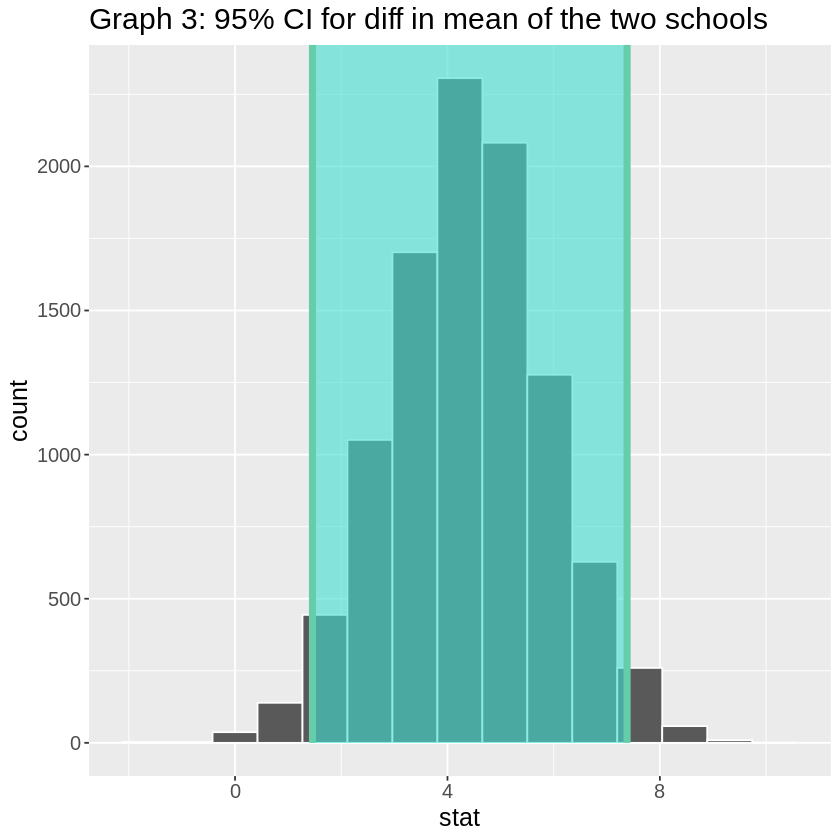

In [6]:
# get 95% confidence interval (bootstrap)
percentile_ci <- bootstrap_distribution %>% 
  get_confidence_interval(level = 0.95, type = "percentile")
print('Tibble 7: Confidence interval acquired using bootstrapping method')
percentile_ci

# visualize the bootstrap distribution
visualize(bootstrap_distribution, binwidth= 0.5) + 
  shade_confidence_interval(endpoints = percentile_ci)+
 theme(text = element_text(size = 15))+
  ggtitle("Graph 3: 95% CI for diff in mean of the two schools")

#getting the standard error of bootstrapping method (computer generated simulations)
se_bootstrap<- bootstrap_distribution %>% 
     ungroup() %>%     
    summarize(se = sd(stat)) %>% 
    as.numeric()
print('Value 1: Standard error of bootstrapping method')
se_bootstrap

We then declared the null hypothesis using the hypothesize() function of the infer package. Since the null model hypothesizes the independence of two different populations, we passed `null = "independence"` as an argument to the function. After getting the null model, get_p_value() function calculated the right-tailed p-value.

Also, at this point, we decided to use a significant level of 0.05.


[1] "Tibble 8: Null distribution (z-model)"


replicate,stat
<int>,<dbl>
1,1.185
2,-0.210
3,-0.970
4,0.230
5,0.850
6,2.510


[1] "Tibble 9: P value from bootstrapping method"


p_value
<dbl>
0.0015


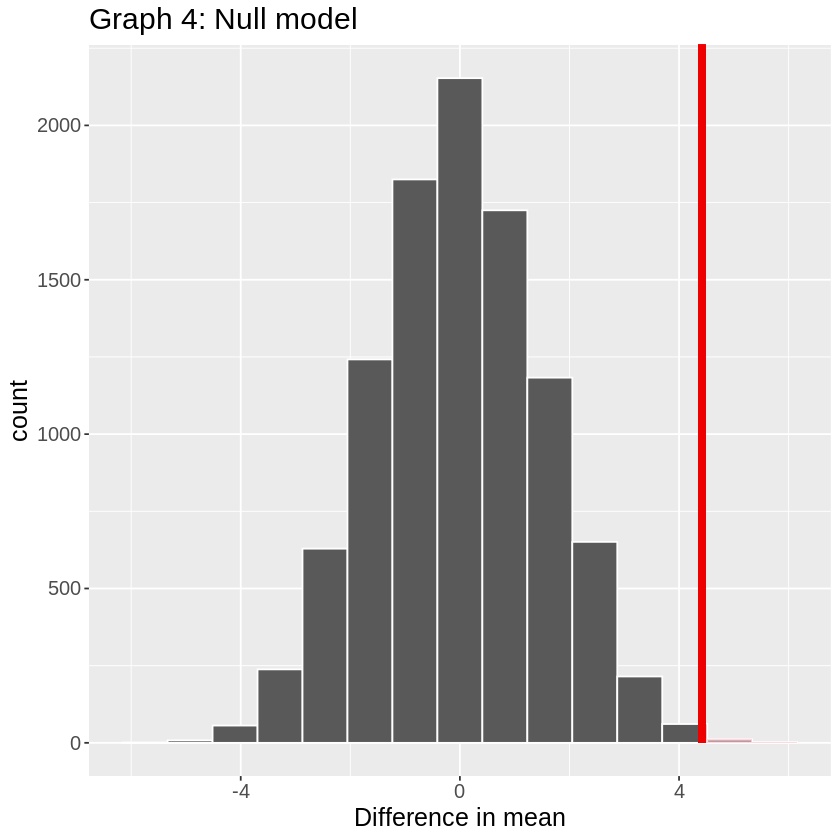

In [7]:
set.seed(1)
#get creating null model 
null_differnece<- exam_school_type_sample %>% 
    specify(formula = AVERAGE_PERCENT ~PUBLIC_OR_INDEPENDENT ) %>% 
    hypothesize(null = "independence") %>%
    generate(reps = 10000, type = "permute") %>% 
    calculate(stat = "diff in means", c("BC Independent School", "BC Public School"))
print('Tibble 8: Null distribution (z-model)')
head(null_differnece)

#visualize null model with red line being observed difference in mean from our sample
diff_in_mean_plot <-
    visualize(null_differnece, binwidth = 0.5) + 
    shade_p_value(obs_stat = as.numeric(obs_diff_in_mean), direction = "right") +
    xlab("Difference in mean") +
     theme(text = element_text(size = 15))+
    ggtitle("Graph 4: Null model")
diff_in_mean_plot

#get p-value
p_value_permute <- null_differnece%>% 
          get_p_value(obs_stat = as.numeric(obs_diff_in_mean), direction = "right")
print('Tibble 9: P value from bootstrapping method')
p_value_permute

Now, we are using the asymptotics method to compare the means of two independent populations by conducting a two-sample difference of mean t-test. We used qt() function to get the confidence interval of 95% and  used the pt() function to get the p-value for our hypothesis test.

Test statistic: 
$$
T = \frac{\bar{x}-\bar{y} - d_0}{\sqrt{\frac{s_1^2}{n_1} - \frac{s_2^2}{n_2}} }
$$

Null model: $t$-distribution with approximately $\nu$ degrees of freedom, where 
$$
\nu = \frac{
    \left(\frac{s_1^2}{n_1}+\frac{s_2^2}{n_2}\right)^2
}
{
\frac{s_1^4}{n_1^2(n_1-1)}+\frac{s_2^4}{n_2^2(n_2-1)}
}
$$

In [8]:
#standard error
se<-sqrt(data_for_each_catetegory$sd[1]^2/40 + data_for_each_catetegory$sd[2]^2/40)
print('Value 2: Standard error for asymptotics')
se
#degree of freedom
v<-(data_for_each_catetegory$sd[1]^2/40 + data_for_each_catetegory$sd[2]^2/40)^2/((data_for_each_catetegory$sd[1]^4/(40^2*(40-1))+(data_for_each_catetegory$sd[2]^4/(40^2*(40-1)))))
print('Value 3: Degree of freedom for asymptotics')
v

#get confidence interval endpoints of 95% (t-test)
diff_mean_ci_t <- tibble(
    lower_ci = qt(0.025, v) *se+ as.numeric(obs_diff_in_mean),
    upper_ci = qt(0.975,v)*se + as.numeric(obs_diff_in_mean)
)
print('Tibble 10: Confidence intervals acquired using asymptotics')
diff_mean_ci_t

#t value 
t_value <- (as.numeric(obs_diff_in_mean)- 0)/se
print('Value 4: T-value')
t_value

#get p-value using t-test 
v<-(data_for_each_catetegory$sd[1]^2/40 + data_for_each_catetegory$sd[2]^2/40)^2/((data_for_each_catetegory$sd[1]^4/(40^2*(40-1))+(data_for_each_catetegory$sd[2]^4/(40^2*(40-1)))))
p_value <-  pt(t_value, df = v, lower.tail=FALSE)
print('Value 5: P value from asymptotics')
p_value

[1] "Value 2: Standard error for asymptotics"


[1] 1.491939

[1] "Value 3: Degree of freedom for asymptotics"


[1] 61.65316

[1] "Tibble 10: Confidence intervals acquired using asymptotics"


lower_ci,upper_ci
<dbl>,<dbl>
1.432323,7.397677


[1] "Value 4: T-value"


[1] 2.959237

[1] "Value 5: P value from asymptotics"


[1] 0.002185338

In [9]:
#p_value using t.test() function
t_test<- t.test(x = exam_school_type_sample %>% filter(PUBLIC_OR_INDEPENDENT == "BC Independent School") %>% pull(AVERAGE_PERCENT), 
                          y = exam_school_type_sample %>% filter(PUBLIC_OR_INDEPENDENT == "BC Public School") %>% pull(AVERAGE_PERCENT),
                          alternative = "greater") %>% 
        tidy()
print('Tibble 11: P value from asymptotics using t.test()')
t_test

[1] "Tibble 11: P value from asymptotics using t.test()"


estimate,estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
4.415,76.33,71.915,2.959237,0.002185338,61.65316,1.923542,Inf,Welch Two Sample t-test,greater


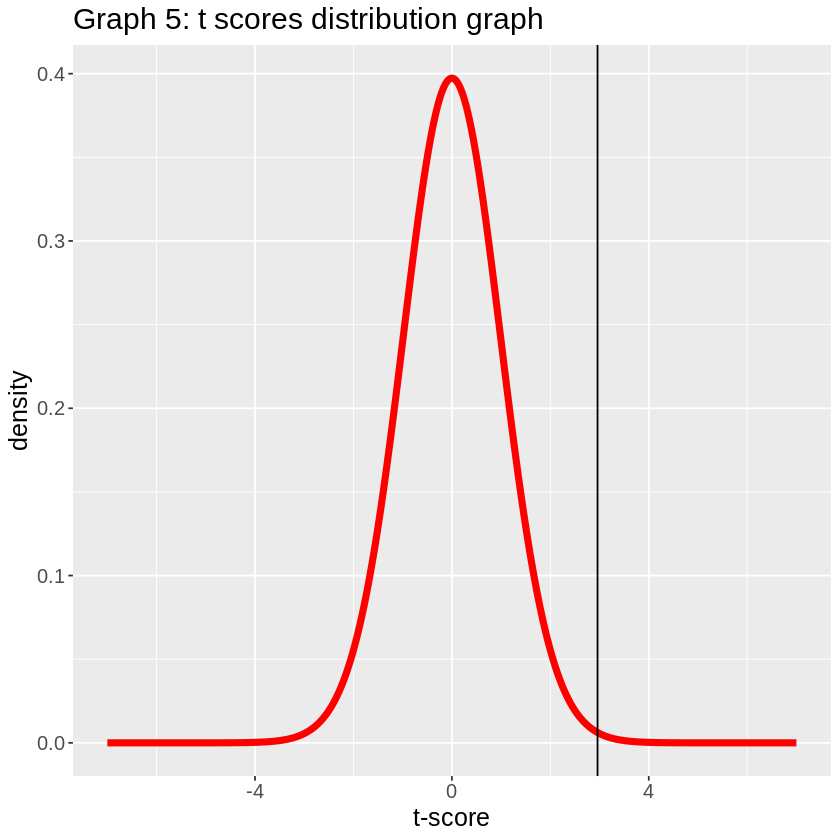

In [10]:
#visualize t distribution graph
sampling_dist_sample_mean_z <- 
    ggplot() +
    geom_line(data = tibble(x = seq(-7, 7, 0.01), 
                            density = dt(x, df = v)), 
              aes(x = x, y = density), color = "red", lwd = 2) + 
    xlab("t-score") +
  theme(text = element_text(size = 15))+
    ggtitle("Graph 5: t scores distribution graph")+
    geom_vline(xintercept = t_value)
sampling_dist_sample_mean_z

In [11]:
# accumulate summary of stats recieved
summary<- tibble(
  type = c("bootrapping","CLT/t-value"), 
  lower_ci = c(percentile_ci$lower_ci, diff_mean_ci_t$lower_ci),
  upper_ci= c(percentile_ci$upper_ci, diff_mean_ci_t$upper_ci),
  p_value = c(as.numeric(p_value_permute), p_value),
  se = c(se_bootstrap, se)
)
print('Tibble 12: Summary statistics')
summary

[1] "Tibble 12: Summary statistics"


type,lower_ci,upper_ci,p_value,se
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
bootrapping,1.458018,7.382629,0.001500000,1.487762
CLT/t-value,1.432323,7.397677,0.002185338,1.491939


## Results

We obtained an observed mean difference of 4.415%, meaning that from our sample, we found that private school students have on average 4.415% higher English 12 marks than their public school counterparts. Using bootstrapping, we determined the p-value of this mean difference to be 0.0015, with a 95% confidence interval of  endpoints 1.458018 and 7.382629. This means we are  95% confident that the true difference in averages is between  1.458018% and 7.382629%.  For the t-test, we first manually calculated the test statistic and obtained a value of 2.959. With this, we found a p-value of 0.002185. As shown in graph 4, the observed value is far to the right of the null model, indicating that we are very unlikely to obtain this value if the null hypothesis were true. Using the t.test() function in R, we obtained the same result indicating that our method of conducting the t-test was correct. Using the t-test, we found a 95% confidence interval of endpoints 1.432323 and 7.397677. This means we are  95% confident that the true difference in averages is between  1.432323% and 7.397677%.  At a significance level of 0.05, we reject the null hypothesis using both bootstrap and t-test and conclude that private school students do have higher English 12 final marks than public school students. 

Bootstrapping and asymptotics (t-test) produced similar results, although the t-test produced a slightly wider confidence interval. In our case, either bootstrapping or asymptotics would be appropriate for this analysis.

## Discussion

We found that the difference in English 12 final grades between public and private high schools to be significant. Specifically, the scores of private high schools were higher by an average of about 4.4%. After analyzing our data using two different methods we found our p-value to be around 0.002 in both cases and the 95% confidence interval in both bootstrapping and t-test does not capture the value of 0. So, we can confidently say that our conclusions are replicable and are very incompatible with our null hypothesis (H0: no difference is observed between the school types). Therefore, it is appropriate to generalize the results found in this report to private and public high schools all over BC. Even though the result of our sample p-test rejects the null hypothesis there is still a chance that we may have gotten a bad sample that does not represent the population well.

In accordance with our preliminary results, we expected to find that mean final English 12 grades to be higher in BC independent schools rather than public. Which coincides with the results found. 

This analysis suggests that there are some factors that result in private high schools having a higher average English 12 final grade than public schools. Therefore, these findings could potentially impact the decisions parents make regarding their children’s education. It could also influence the amount of government funding that public schools receive. Since the choice (between sending children to a public or private high school) is a luxury that not everyone has, perhaps more government funding for public schools can somewhat balance the incoming revenue disparity between the two school types. This leads to the question of whether the socio-economic status of a family directly affects the child’s performance in school. Although, there may be other hidden variables that also affect their performance, such as peers, attendance, or the quality of teaching received. Future studies could delve deeper into the circumstances of students to gain a more complete picture of what factors ultimately lead to a higher final grade in English 12. 


## Reference

1. Analysis and Reporting Unit, Ministry of Education. (2020). BC schools grade 10, 11, 12 examinations results 2016/2017 to 2019/2020. British Columbia. 
2.  Chen, G. (2019, April 5). Public School vs. Private School. Public School Review. https://www.publicschoolreview.com/blog/public-school-vs-private-school#:%7E:text=Private%20school%20students%20generally%20perform,counterparts%20on%20standardized%20achievement%20tests.&text=Their%20average%20scores%20were%20above,science%20and%20mathematics%20proficiency%20tests.
3. Hernández-Gálvez, D. C., & Roldán-Valadez, E. (2019). Mexican ENARM: performance comparison of public vs. private medical schools, geographic and socioeconomic regions. Salud Pública de México, 61(5, sep-oct), 637. https://doi.org/10.21149/10078
4. Ma, Y., Hou, X., Huang, J., Wang, W., Li, Y., Zhou, X., & Du, X. (2018). Educational inequality and achievement disparity: An empirical study of migrant children in China. Children and Youth Services Review, 87, 145–153. https://doi.org/10.1016/j.childyouth.2018.02.026
5. UNESCO Institute for Statistics. (2020, September). Government expenditure on education, total (% of government expenditure) [Total general (local, regional and central) government expenditure on education (current, capital, and transfers), expressed as a percentage of GDP. It includes expenditure funded by transfers from international sources to government.]. The World Bank. https://data.worldbank.org/indicator/SE.XPD.TOTL.GB.ZS
